In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from numpy import linalg as LA
import copy

In [56]:
n = 1000
t_1 , t_2 = symbols('t1 t2')

In [57]:
x = np.arange(n)/n+0.1*np.random.normal(0,1,n)
y = 10*np.arange(n)/n+1+0.1*np.random.normal(0,1,n)
x_save = copy.deepcopy(x)
y_save = copy.deepcopy(y)

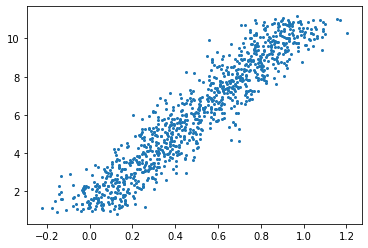

In [58]:
plt.scatter(x,y,4)

In [59]:
x = np.append(x.reshape(-1,1), np.ones(n).reshape(-1,1),axis=1)
theta_1 = np.array([t_1,t_2])
step_size = 0.1 

In [60]:
def func_cot(y, x, tetha):
    print(len(x))
    return (1/(2*len(x)))*(np.sum((y-np.dot(x,tetha))**2))

def find_out_next_theta(theta,enta):
    f_prom = lambdify([t_1, t_2], grad)
    data = f_prom(float(theta[0]) , float(theta[1]))
    return [data[0]*enta, data[1]*enta]

In [61]:
Q = func_cot(y,x,theta_1);

1000


In [62]:
grad = [diff(Q,t_1), diff(Q,t_2)];grad

[0.333457226134461*t1 + 0.491957968696079*t2 - 3.77327481344938,
 0.491957968696079*t1 + 1.0*t2 - 5.99734190596822]

In [63]:
teheta_0 = [0,0]
enta = 0.1
iterations = 1000
history = []
k = 0 

In [64]:
for i in range(iterations):
    teheta_1 = np.array(teheta_0) - np.array(find_out_next_theta(teheta_0, enta)) 
    history.append(teheta_1)
    if LA.norm(teheta_1 - teheta_0) <= 10**(-5):
        break
    teheta_0 = teheta_1
    k += 1


In [65]:
print(k)

1000


In [66]:
x_2 = np.linspace(-0.2,1.2,100)

In [67]:
y_2 = x_2*teheta_0[0] + teheta_0[1]

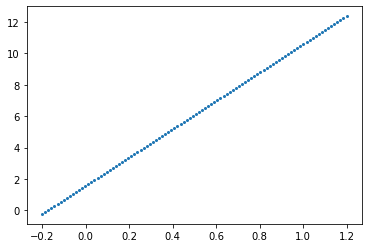

In [68]:
plt.scatter(x_2,y_2,4)

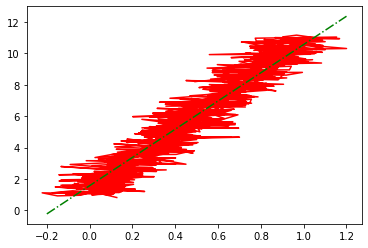

In [69]:
fig = plt.figure()
plt.plot(x_save, y_save, '-r', label='Данные')
plt.plot(x_2, y_2,'-.g', label='Линейная регрессия')